The best it can be done to really understand probability distributions and their parameters is to visualize them and actually play with the parameters and understand what happens when we do that. I will put some popular probability distributions generated with random data below to play with. Enjoy!

#### Normal distribution  N(μ, σ)
**The Normal disctribution is a continous distribution with the classic bell-shaped curve. Models many natural phenomena.**

Parameters:
- μ: mean
- 𝜎: standard deviation

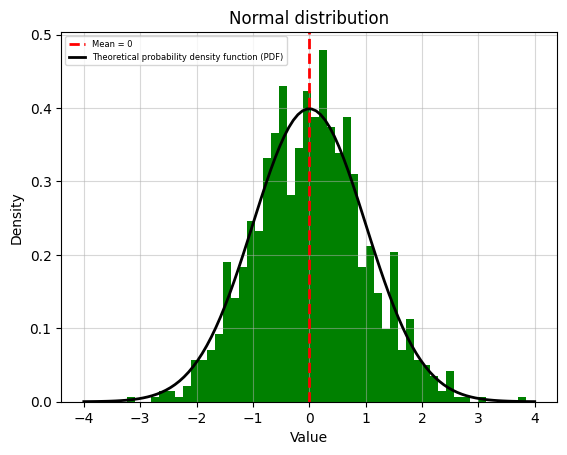

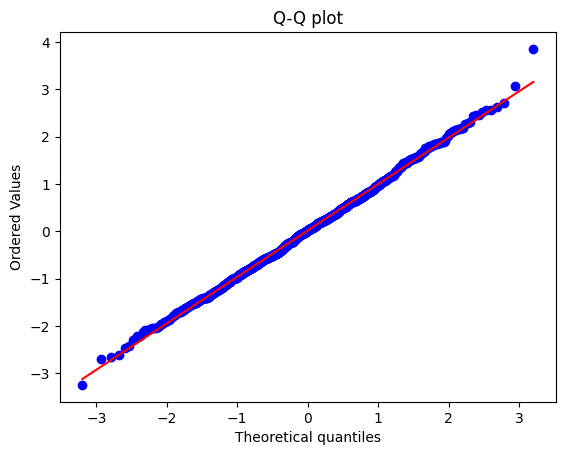

In [32]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 0        # mean / center of the distribution
deviation = 1   # standard deviation (width of the distribution)
size = 1000     # number of samples

# Generate data
np.random.seed(42)
normal_sample = np.random.normal(loc=mean, scale=1, size=size)

# Create histogram
plt.hist(normal_sample, bins=50, density=True, color='g')

# Add the mean line
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean}')

# Add the theoretical curve of the density function
x = np.linspace(mean - 4*deviation, mean + 4*deviation, 100)
plt.plot(x, norm.pdf(x, mean, deviation), 'k-', linewidth=2, label='Theoretical probability density function (PDF)')

# Congigure the histogram
plt.legend(loc='upper left', prop={'size':6})
plt.title("Normal distribution")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.5)
plt.show()

# Additionally, create a QQ Plot to check how the distribution compares to the theoretical distribution
fig, ax = plt.subplots()
stats.probplot(normal_sample, dist=stats.norm, plot=ax)
plt.title('Q-Q plot')
plt.show()

### Student's t-distribution t(ν)
**Symmetric bell-shaped continous distribution used especially for small samples when the population standard deviation is unknown.**

Parameter:
- 𝜈: degrees of freedom (positive integer)

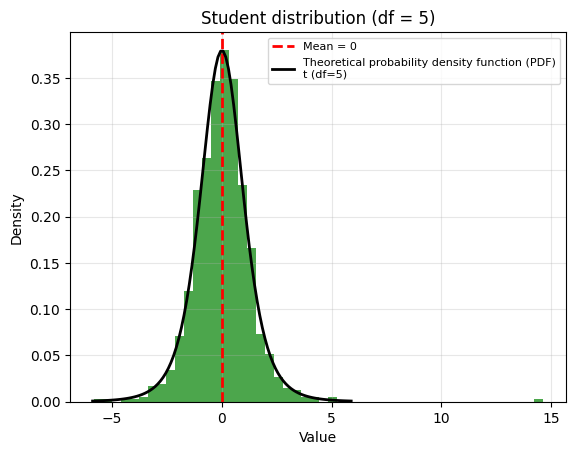

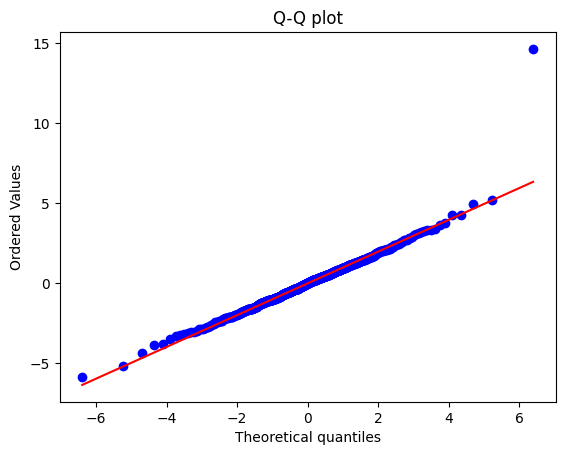

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

mean = 0                # mean / center of the distribution
degrees_of_freedom = 5  # width of the tails
size = 1000             # number of samples

# Generate the data
np.random.seed(42)
t_sample = np.random.standard_t(df=degrees_of_freedom, size=size)

# Create histogram
plt.hist(t_sample, bins=50, density=True, color='g', alpha=0.7)

# Add the mean line
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean}')

# Add the theoretical curve of the density function
x = np.linspace(t.ppf(0.001, degrees_of_freedom), t.ppf(0.999, degrees_of_freedom), 100)
plt.plot(x, t.pdf(x, degrees_of_freedom), 'k-', linewidth=2, 
         label=f'Theoretical probability density function (PDF)\nt (df={degrees_of_freedom})')

# Set histogram up
plt.legend(loc='upper right', prop={'size': 8})
plt.title(f"Student distribution (df = {degrees_of_freedom})")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

# Additionally, create a QQ Plot to check how the distribution compares to the theoretical distribution
fig, ax = plt.subplots()
stats.probplot(t_sample, dist=stats.t, sparams=(degrees_of_freedom,) ,plot=ax)
plt.title('Q-Q plot')
plt.show()

#### Bernoulli Distribution Be(p)

**Discrete distribution that models a single experiment with two outcomes: success (1) or failure (0).**
<br>
Did the product pass quality control? Yes or No.

Parameter:

- 𝑝: probability of success, 0 ≤ 𝑝 ≤ 1

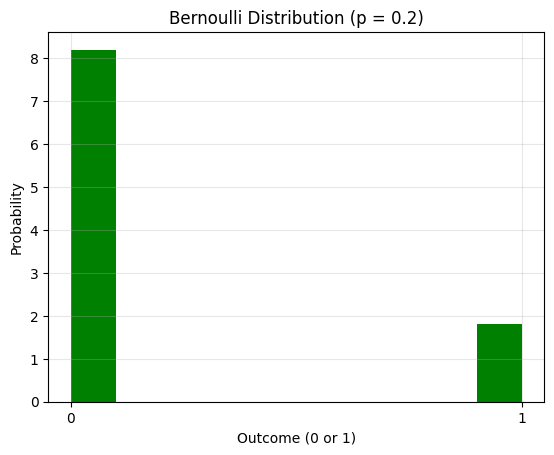

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import bernoulli

p = 0.2         # probability of success
size = 100      # number of samples

# Generate the data
np.random.seed(42)
bernoulli_sample = np.random.binomial(n=1, p=p, size=size)

# Create histogram (just two bins for 0 and 1)
plt.hist(bernoulli_sample, density=True, color='g')

# Set histogram up
plt.title(f"Bernoulli Distribution (p = {p})")
plt.xlabel('Outcome (0 or 1)')
plt.ylabel('Probability')
plt.xticks([0, 1]) # I don't need to see all the decimal values between 0 and 1
plt.grid(True, alpha=0.3)
plt.show()

### Binomial distribution Bi(n, p)
**Discrete distribution that counts the number of successes in 𝑛 independent Bernoulli trials.**
<br>
How many customers buy a product out of 20 who see it?

Parameters:

- 𝑛: number of trials
- 𝑝: probability of success in each trial

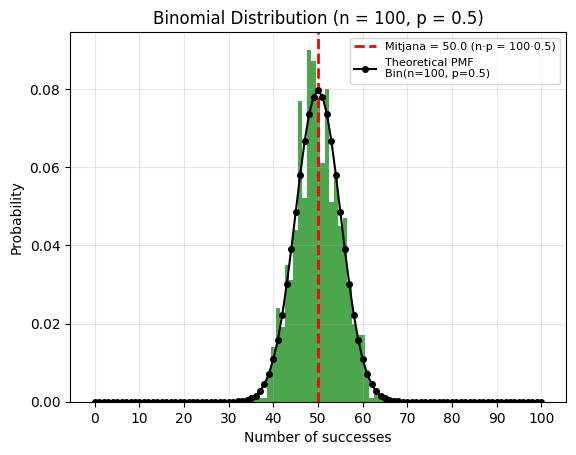

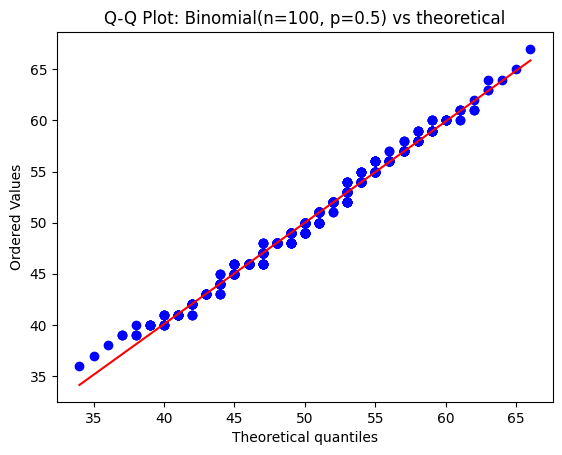

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom

n = 100     # number of trials
p = 0.5     # success probability per trial
size = 1000 # number of samples

# Generate the data
np.random.seed(42)
binomial_sample = np.random.binomial(n=n, p=p, size=size)

# Create histogram
plt.hist(binomial_sample, bins=np.arange(n+2)-0.5, density=True, color='g', alpha=0.7)

# Add the mean line
mean = n * p
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, 
            label=f'Mitjana = {mean:.1f} (n·p = {n}·{p})')

# Add theoretical Probability Mass Function (PMF)
x = np.arange(0, n+1)  # All possible success counts (0 to n)
plt.plot(x, binom.pmf(x, n, p), 'ko-', linewidth=1.5, markersize=4,
         label=f'Theoretical PMF\nBin(n={n}, p={p})')

# Set histogram up
plt.legend(loc='upper right', prop={'size': 8})
plt.title(f"Binomial Distribution (n = {n}, p = {p})")
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.xticks(np.arange(0, n+1, step=max(1, n//10)))  # Reasonable tick spacing
plt.grid(True, alpha=0.3)
plt.show()

# Additionally, create a QQ Plot to check how the distribution compares to the theoretical distribution
stats.probplot(binomial_sample, dist=binom, sparams=(n, p), plot=plt)  # Comparem amb binomial
plt.title(f'Q-Q Plot: Binomial(n={n}, p={p}) vs theoretical')
plt.show()

# Notes: 
# * The Binomial distribution counts successes in n trials
# * Due to the Central Limit Theorem, we can observe that a large number of trials will make our distribution
#   approximate the shape of a Normal distribution

### Geometric distribution Geom(p)
**Discrete distribution that Models the number of trials until the first success in independent Bernoulli trials.**
<br>
How many times do I roll a die until I get a 6?

Parameter:

- 𝑝: probability of success, 0 ≤ 𝑝 ≤ 1

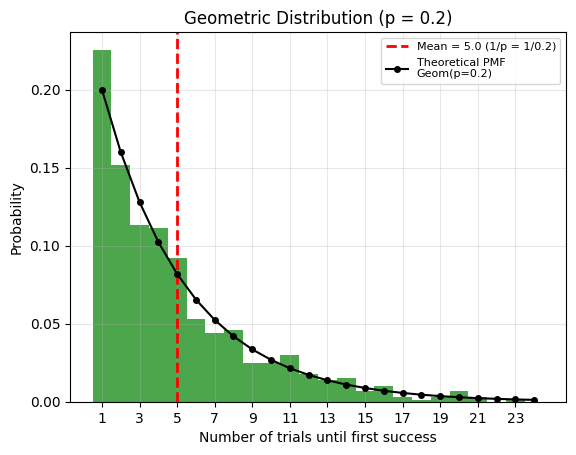

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import geom

p = 0.2         # probability of success on each trial
size = 1000     # number of samples

# Generate the data
np.random.seed(42)
geometric_sample = np.random.geometric(p=p, size=size)

# Determine reasonable bin range (most outcomes will be < 25 for p=0.2)
max_x = min(25, np.max(geometric_sample) + 2)

# Create histogram
plt.hist(geometric_sample, bins=np.arange(1, max_x + 1) - 0.5, 
         density=True, color='g', alpha=0.7)

# Add the mean line
mean = 1/p
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {mean:.1f} (1/p = 1/{p})')

# Add theoretical Probability Mass Function (PMF)
x = np.arange(1, max_x)
plt.plot(x, geom.pmf(x, p), 'ko-', linewidth=1.5, markersize=4,
         label=f'Theoretical PMF\nGeom(p={p})')

# Set histogram up
plt.legend(loc='upper right', prop={'size': 8})
plt.title(f"Geometric Distribution (p = {p})")
plt.xlabel('Number of trials until first success')
plt.ylabel('Probability')
plt.xticks(np.arange(1, max_x, step=max(1, max_x//10)))
plt.grid(True, alpha=0.3)
plt.show()

# Note:
# * The mean of a Geometric distribution represents the average number of trials needed to get the first success, 
#   while the histogram shows the probability of success on trial *k*.

#### Negative Binomial distribution NB(r, p)

**Is a discrete distribution that models the number of trials until achieving the r-th success.** <br>
How many trials do I need to reach x successes?

Parameters:

- r: number of successes (positive integer)
- 𝑝: probability of success in each trial, 0 ≤ 𝑝 ≤ 1

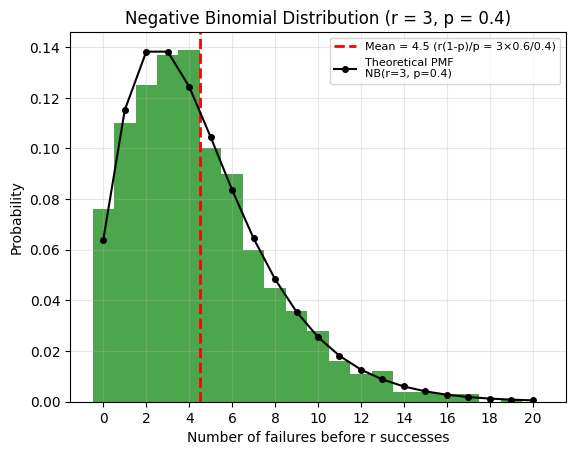

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters
r = 3       # number of successes until stopping
p = 0.4     # probability of success on each trial
size = 1000 # number of samples

# Generate the data
np.random.seed(42)
nbinom_sample = nbinom.rvs(r, p, size=size)

# Determine reasonable bin range
max_x = min(50, np.max(nbinom_sample) + 2)

# Create histogram
plt.hist(nbinom_sample, bins=np.arange(0, max_x + 1) - 0.5, 
         density=True, color='g', alpha=0.7)

# Add the mean line
mean = r * (1 - p) / p
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {mean:.1f} (r(1-p)/p = {r}×{1-p:.1f}/{p})')

# Add theoretical Probability Mass Function (PMF)
x = np.arange(0, max_x)
plt.plot(x, nbinom.pmf(x, r, p), 'ko-', linewidth=1.5, markersize=4,
         label=f'Theoretical PMF\nNB(r={r}, p={p})')

# Set histogram up
plt.legend(loc='upper right', prop={'size': 8})
plt.title(f"Negative Binomial Distribution (r = {r}, p = {p})")
plt.xlabel('Number of failures before r successes')
plt.ylabel('Probability')
plt.xticks(np.arange(0, max_x, step=max(1, max_x//10)))
plt.grid(True, alpha=0.3)
plt.show()

# Notes:
# * The Negative Binomial generalizes the Geometric distribution:
#   - Geometric is NB(r=1, p)
# * The mean represents the average number of failures before r successes
# * Key differences from Geometric:
#   - Models counts of failures (not trials)
#   - r > 1 allows for overdispersed count data
# * Common uses:
#   - Modeling overdispersed Poisson data (variance > mean)
#   - Survival analysis (time until r events)
#   - RNA-seq data in biology

#### Beta distribution Beta(α, β)

**A continuous distribution defined on the interval [0,1], commonly used to model random probabilities or proportions.**

Parameters:

- 𝛼: shape parameter (also called "alpha"), α>0
- 𝛽: shape parameter (also called "beta"), 𝛽>0

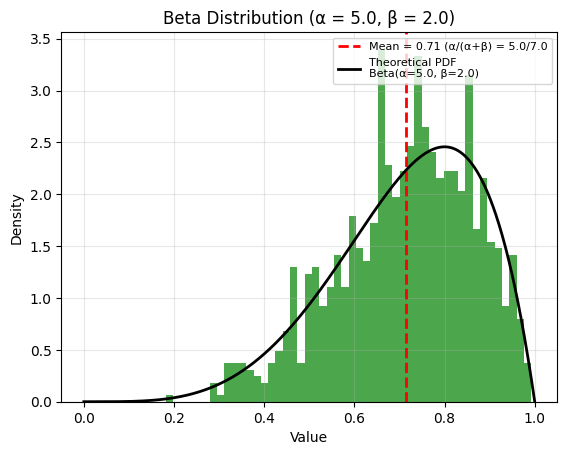

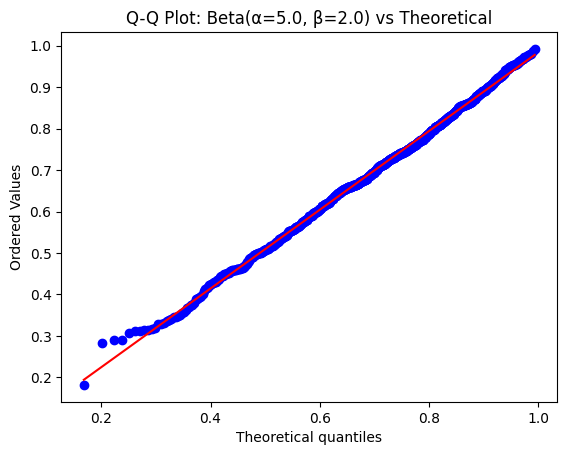

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta

# Parameters
a = 5.0  # alpha parameter (must be > 0)
b = 2.0  # beta parameter (must be > 0)
size = 1000  # number of samples

# Generate the data
np.random.seed(42)
beta_sample = np.random.beta(a, b, size)

# Create histogram
plt.hist(beta_sample, bins=50, density=True, color='g', alpha=0.7)

# Add the mean line
mean = a / (a + b)
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {mean:.2f} (α/(α+β) = {a}/{a+b}')

# Add theoretical Probability Density Function (PDF)
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, a, b), 'k-', linewidth=2,
         label=f'Theoretical PDF\nBeta(α={a}, β={b})')

# Set histogram up
plt.legend(loc='upper right', prop={'size': 8})
plt.title(f"Beta Distribution (α = {a}, β = {b})")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

# Q-Q plot for Beta distribution
fig, ax = plt.subplots()
stats.probplot(beta_sample, dist=beta, sparams=(a, b), plot=ax)
plt.title(f'Q-Q Plot: Beta(α={a}, β={b}) vs Theoretical')
plt.show()

# Notes:
#  Observe the following behaviors
#  * For α<β: Right-skewed distribution
#  * For α>β: Left-skewed distribution
#  * For α=β=0.5: U-shaped distribution
#  * For α=β=1: Uniform distribution

# Interpretation of the mean:
# Represents the expected probability of success in a Bernoulli process.

#### Gamma distribution Gamma(α, β)

**A continuous distribution used to model *waiting times* or *lifetimes of processes* where events happen *continuously and independently*. It's a generalization of the exponential distribution.**

Parameters:

- 𝛼: shape parameter (denoted 𝑘 sometimes), α>0
- 𝛽: shape parameter (inverse of scale), 𝛽>0

*Note: In some texts, you'll also find the parameterization as Gamma(α, θ), where θ=1/β is the scale parameter instead of rate.*

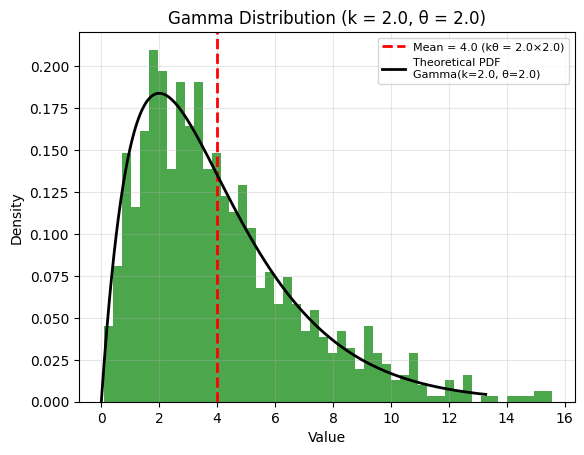

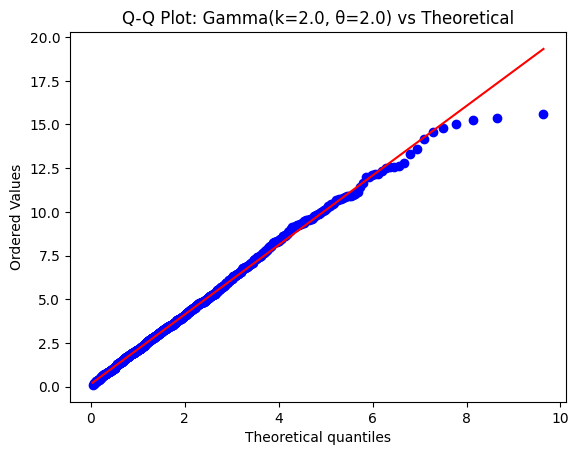

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gamma

# Parameters
k = 2.0    # shape parameter (k > 0)
theta = 2.0  # scale parameter (θ > 0)
size = 1000  # number of samples

# Generate the data
np.random.seed(42)
gamma_sample = np.random.gamma(shape=k, scale=theta, size=size)

# Create histogram
plt.hist(gamma_sample, bins=50, density=True, color='g', alpha=0.7)

# Add the mean line
mean = k * theta
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {mean:.1f} (kθ = {k}×{theta})')

# Add theoretical Probability Density Function (PDF)
x = np.linspace(0, gamma.ppf(0.99, k, scale=theta), 1000)
plt.plot(x, gamma.pdf(x, k, scale=theta), 'k-', linewidth=2,
         label=f'Theoretical PDF\nGamma(k={k}, θ={theta})')

# Set histogram up
plt.legend(loc='upper right', prop={'size': 8})
plt.title(f"Gamma Distribution (k = {k}, θ = {theta})")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

# Q-Q plot for Gamma distribution
fig, ax = plt.subplots()
stats.probplot(gamma_sample, dist=gamma, sparams=(k,), plot=ax)
plt.title(f'Q-Q Plot: Gamma(k={k}, θ={theta}) vs Theoretical')
plt.show()

# Notes:
# Observe the following behaviors:
# * For k < 1: L-shaped (strictly decreasing)
# * For k = 1: Exponential distribution
# * For 1 < k < 2: Right-skewed with mode at (k-1)θ
# * For k ≥ 2: Near-symmetric (approaches Normal as k → ∞)
# * For θ = 1/λ: Becomes rate parameterization (common in survival analysis)
# * Special case: When k=1, becomes Exponential(λ=1/θ)
# * Special case: When θ=2, becomes Chi-squared(ν=2k)

# Interpretation of the mean:
# Represents the average waiting time for k events to occur in a Poisson process with rate λ = 1/θ.

#### Poisson distribution — P(λ)
**Discrete distribution that shows the number of events in a fixed interval of time or space**
<br>
How many calls arrive at a help desk per hour?

Parameter:

- λ: average rate of events per interval

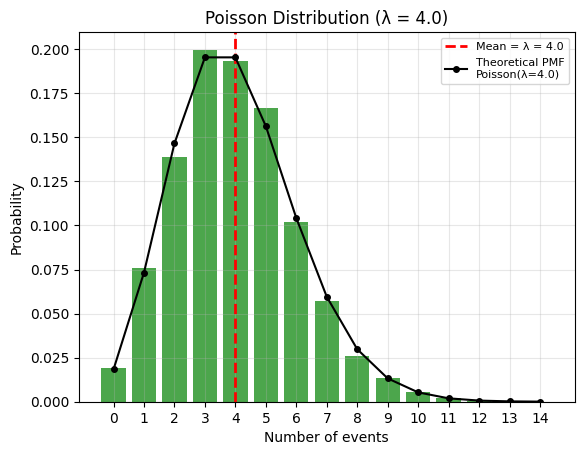

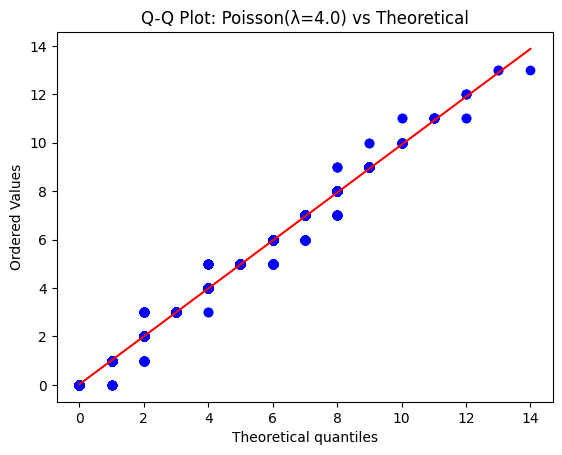

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lam = 4.0    # λ (lambda) = average rate of events
size = 1000  # number of samples

# Generate the data
np.random.seed(42)
poisson_sample = np.random.poisson(lam, size)

# Determine reasonable bin range (most outcomes will be < 2λ)
max_x = min(20, np.max(poisson_sample) + 2)

# Create histogram
plt.hist(poisson_sample, bins=np.arange(0, max_x + 1) - 0.5, 
         density=True, color='g', alpha=0.7, rwidth=0.8)

# Add the mean line
plt.axvline(x=lam, color='red', linestyle='--', linewidth=2, 
            label=f'Mean = λ = {lam}')

# Add theoretical Probability Mass Function (PMF)
x = np.arange(0, max_x)
plt.plot(x, poisson.pmf(x, lam), 'ko-', linewidth=1.5, markersize=4,
         label=f'Theoretical PMF\nPoisson(λ={lam})')

# Set histogram up
plt.legend(loc='upper right', prop={'size': 8})
plt.title(f"Poisson Distribution (λ = {lam})")
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.xticks(np.arange(0, max_x, step=max(1, max_x//10)))
plt.grid(True, alpha=0.3)
plt.show()

# Q-Q plot for Poisson distribution
fig, ax = plt.subplots()
stats.probplot(poisson_sample, dist=poisson, sparams=(lam,), plot=ax)
plt.title(f'Q-Q Plot: Poisson(λ={lam}) vs Theoretical')
plt.show()

# Notes:
# * The Poisson distribution models counts of rare events in fixed intervals
# * Key properties:
#   - Mean = λ (average event rate)
#   - Variance = λ (equidispersion)
#   - Skewness decreases as λ increases (→ Normal for λ > 20)
# * When λ < 1: Highly right-skewed
# * When λ > 10: Nearly symmetric
# * Common uses:
#   - Modeling call center arrivals
#   - Particle decay counts
#   - Website visits per hour

#### Exponential distribution Exp(λ)

**Continuous probability distribution modeling time between events in a Poisson process**
<br>
Time until next customer arrival, component lifetime, radioactive decay intervals.

Parameters:

- λ: rate parameter (events per unit time)

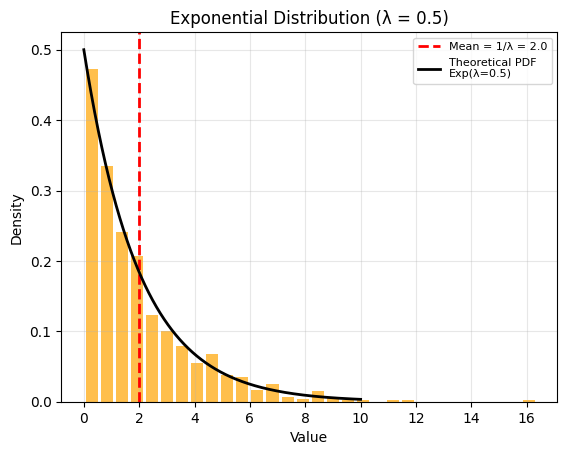

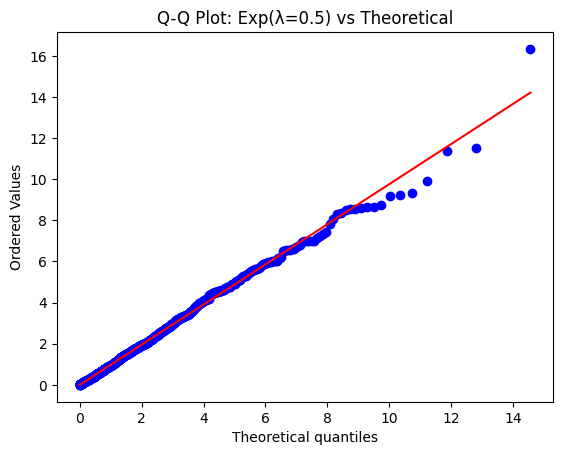

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import expon

# Parameters
lam = 0.5    # rate parameter (lambda)
size = 1000  # number of samples

# Generate the data
np.random.seed(42)
exponential_sample = np.random.exponential(1/lam, size)

# Create histogram
plt.hist(exponential_sample, bins=30, density=True, color='orange', alpha=0.7, rwidth=0.8)

# Add the mean line
mean = 1/lam
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, 
            label=f'Mean = 1/λ = {mean:.1f}')

# Add theoretical Probability Density Function (PDF)
x = np.linspace(0, 10, 1000)
plt.plot(x, expon.pdf(x, scale=1/lam), 'k-', linewidth=2,
         label=f'Theoretical PDF\nExp(λ={lam})')

# Set histogram up
plt.legend(loc='upper right', prop={'size': 8})
plt.title(f"Exponential Distribution (λ = {lam})")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

# Q-Q plot for Exponential distribution
fig, ax = plt.subplots()
stats.probplot(exponential_sample, dist=expon, sparams=(0, 1/lam), plot=ax)
plt.title(f'Q-Q Plot: Exp(λ={lam}) vs Theoretical')
plt.show()

# Notes:
# * The Exponential distribution models waiting times and lifetimes
# * Key properties:
#   - Mean = 1/λ (expected waiting time)
#   - Variance = 1/λ² (variability in waiting times)
#   - Memoryless property: P(X > s+t | X > s) = P(X > t)
# * Special cases:
#   - Rate λ=1 gives standard exponential
# * Common uses:
#   - Reliability engineering (failure times)
#   - Queueing theory (service times)
#   - Survival analysis

#### Chi-square distribution χ²(df)

**Continuous probability distribution for sum of squared standard normal random variables**
<br>
Hypothesis testing, goodness-of-fit tests, testing variance equality.

Parameters:

- df: degrees of freedom

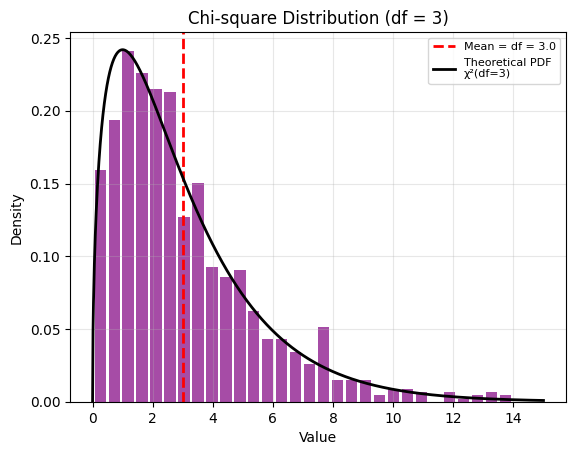

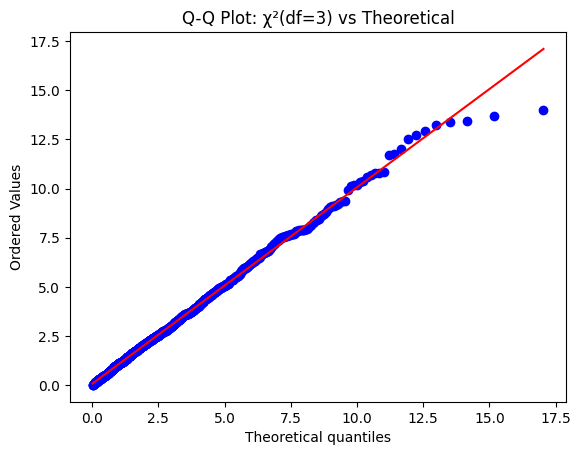

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2

# Parameters
df = 3       # degrees of freedom
size = 1000  # number of samples

# Generate the data
np.random.seed(42)
chi2_sample = np.random.chisquare(df, size)

# Create histogram
plt.hist(chi2_sample, bins=30, density=True, color='purple', alpha=0.7, rwidth=0.8)

# Add the mean line
mean = df
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, 
            label=f'Mean = df = {mean:.1f}')

# Add theoretical Probability Density Function (PDF)
x = np.linspace(0, 15, 1000)
plt.plot(x, chi2.pdf(x, df), 'k-', linewidth=2,
         label=f'Theoretical PDF\nχ²(df={df})')

# Set histogram up
plt.legend(loc='upper right', prop={'size': 8})
plt.title(f"Chi-square Distribution (df = {df})")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

# Q-Q plot for Chi-square distribution
fig, ax = plt.subplots()
stats.probplot(chi2_sample, dist=chi2, sparams=(df,), plot=ax)
plt.title(f'Q-Q Plot: χ²(df={df}) vs Theoretical')
plt.show()

# Notes:
# * The Chi-square distribution models sum of squared standard normals
# * Key properties:
#   - Mean = df (equals degrees of freedom)
#   - Variance = 2×df (twice the degrees of freedom)
#   - Right-skewed, approaches normal as df increases
# * Special cases:
#   - df=1 gives squared standard normal
#   - df=2 gives exponential distribution
# * Common uses:
#   - Goodness-of-fit tests
#   - Test of independence
#   - Variance testing

#### Uniform distribution U(a, b)

**Continous probability distribution in which all values in the interval [a, b] are equally likely**
<br>
Randomly choose a number between 10 and 20.

Parameters:

- 𝑎: lower bound
- 𝑏: upper bound

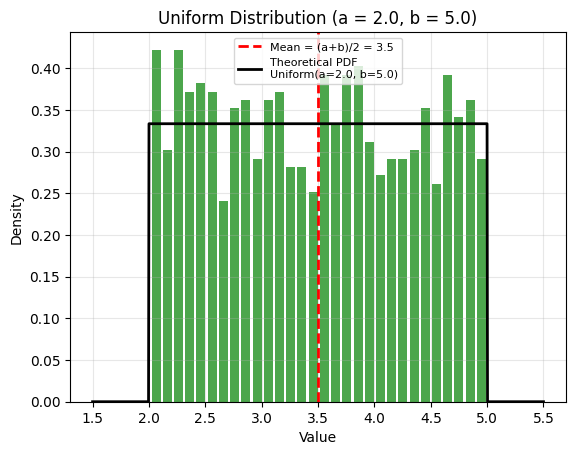

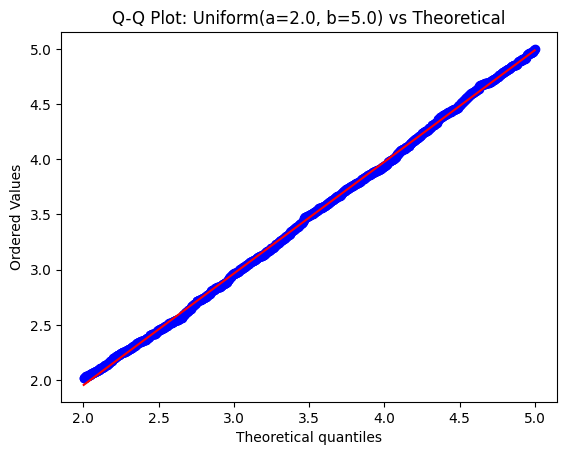

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import uniform

# Parameters
a = 2.0    # lower bound
b = 5.0    # upper bound
size = 1000  # number of samples

# Generate the data
np.random.seed(42)
uniform_sample = np.random.uniform(a, b, size)

# Create histogram
plt.hist(uniform_sample, bins=30, density=True, color='g', alpha=0.7, rwidth=0.8)

# Add the mean line
mean = (a + b) / 2
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, 
            label=f'Mean = (a+b)/2 = {mean:.1f}')

# Add theoretical Probability Density Function (PDF)
x = np.linspace(a - 0.5, b + 0.5, 1000)
plt.plot(x, uniform.pdf(x, a, b - a), 'k-', linewidth=2,
         label=f'Theoretical PDF\nUniform(a={a}, b={b})')

# Set histogram up
plt.legend(loc='upper center', prop={'size': 8})
plt.title(f"Uniform Distribution (a = {a}, b = {b})")
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

# Q-Q plot for Uniform distribution
fig, ax = plt.subplots()
stats.probplot(uniform_sample, dist=uniform, sparams=(a, b - a), plot=ax)
plt.title(f'Q-Q Plot: Uniform(a={a}, b={b}) vs Theoretical')
plt.show()

# Notes:
# * The Uniform distribution models equal probability for all values in [a, b]
# * Key properties:
#   - Mean = (a + b)/2 (center of interval)
#   - Variance = (b - a)²/12
#   - Flat PDF (no skewness or kurtosis)
# * Special cases:
#   - Standard Uniform: a=0, b=1
# * Common uses:
#   - Random number generation
#   - Non-informative priors in Bayesian statistics
#   - Quantization error modeling

#### Ultimate probability distributions cheat sheet


| **Question**                          | **Distribution**      | **Key Parameters** | **Special Notes**                                  |
|---------------------------------------|-----------------------|--------------------|---------------------------------------------------|
| **"Did one trial succeed?"**          | Bernoulli             | `p`                | Binary outcome (1=success, 0=failure)             |
| **"Probability of success?"**         | Beta                  | `α, β`             | Models probabilities on [0,1]; α=β=1 → Uniform    |
| **"Number of successes in n trials?"**| Binomial              | `n, p`             | Sum of n Bernoullis                               |
| **"Trials until first success?"**     | Geometric             | `p`                | Memoryless; NegativeBinomial with r=1             |
| **"Trials until r successes?"**       | Negative Binomial     | `r, p`             | Overdispersed counts; r=1 → Geometric             |
| **"Count of rare events in time?"**   | Poisson               | `λ`                | Mean = Variance = λ                               |
| **"Time between random events?"**     | Exponential           | `λ`                | Memoryless; Gamma with k=1                        |
| **"Time until k events?"**            | Gamma                 | `k, θ`             | k=1 → Exponential; θ=1/rate                       |
| **"Random choice in a range?"**       | Uniform               | `a, b`             | Constant PDF between a and b                      |
| **"Natural variation around mean?"**  | Normal                | `μ, σ`             | Symmetric; CLT applies                            |
| **"Small sample uncertainty?"**       | Student's t           | `ν`                | ν→∞ → Normal; Heavy tails for small ν             |
| **"Hypothesis test statistic**         | Chi-square            | `df`               | Mean = df; Variance = 2×df; Right-skewed          |

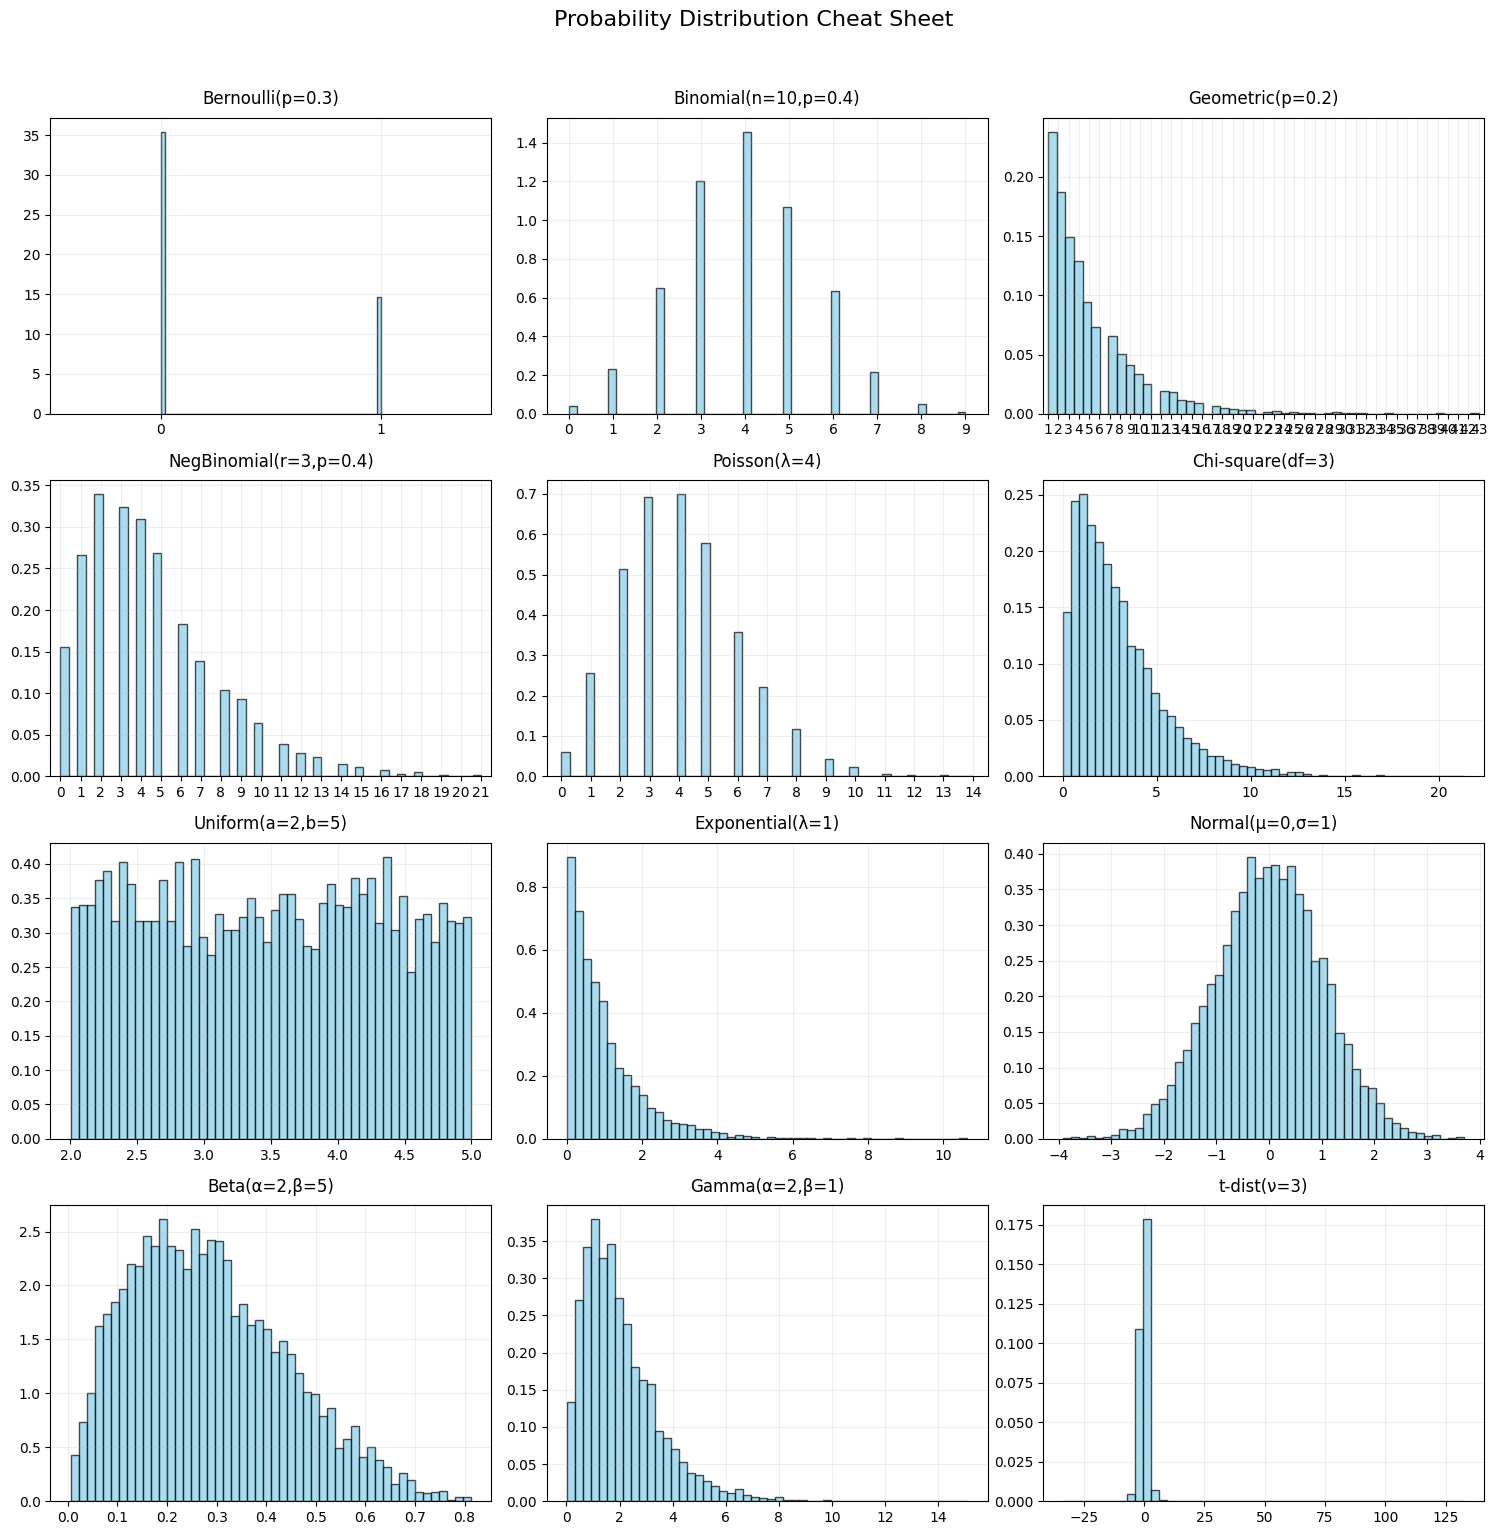

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Set up a 4x3 grid of distributions
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Discrete Distributions
discrete_dists = [
    ("Bernoulli(p=0.3)", lambda: np.random.binomial(1, 0.3, 5000)),
    ("Binomial(n=10,p=0.4)", lambda: np.random.binomial(10, 0.4, 5000)),
    ("Geometric(p=0.2)", lambda: np.random.geometric(0.2, 5000)),
    ("NegBinomial(r=3,p=0.4)", lambda: np.random.negative_binomial(3, 0.4, 5000)),
    ("Poisson(λ=4)", lambda: np.random.poisson(4, 5000)),
    ("Chi-square(df=3)", lambda: np.random.chisquare(3, 5000))
]

# Continuous Distributions
continuous_dists = [
    ("Uniform(a=2,b=5)", lambda: np.random.uniform(2, 5, 5000)),
    ("Exponential(λ=1)", lambda: np.random.exponential(1, 5000)),
    ("Normal(μ=0,σ=1)", lambda: np.random.normal(0, 1, 5000)),
    ("Beta(α=2,β=5)", lambda: np.random.beta(2, 5, 5000)),
    ("Gamma(α=2,β=1)", lambda: np.random.gamma(2, 1, 5000)),
    ("t-dist(ν=3)", lambda: np.random.standard_t(3, 5000))
]

# Combine and plot all distributions
all_dists = discrete_dists + continuous_dists

for ax, (title, sampler) in zip(axes.ravel(), all_dists):
    if title:  # Skip empty slots
        data = sampler()
        ax.hist(data, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
        
        # Special handling for discrete distributions
        if 'Bernoulli' in title or 'Binomial' in title or 'Geometric' in title or 'NegBinomial' in title or 'Poisson' in title:
            ax.set_xticks(np.arange(min(data), max(data)+1))
            ax.set_xlim(min(data)-0.5, max(data)+0.5)
        
        ax.set_title(title, pad=10)
        ax.grid(True, alpha=0.2)
    else:
        ax.axis('off')  # Hide empty subplots

plt.suptitle("Probability Distribution Cheat Sheet", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()